In [2]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sb

dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


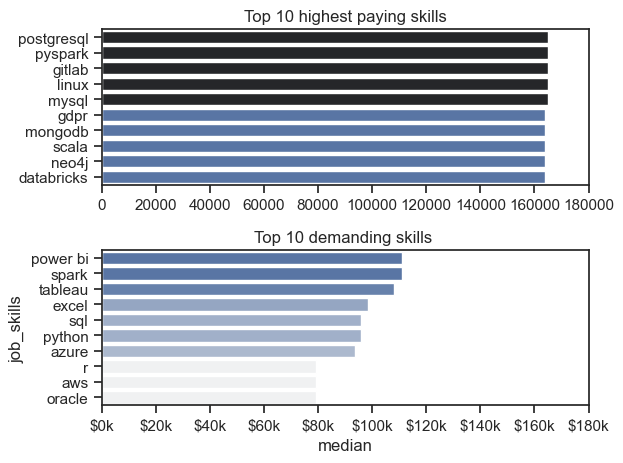

In [9]:
#### Skill Pay Analysis
df_DA_IND1=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='India')].copy()
df_DA_IND1=df_DA_IND1.dropna(subset=['salary_year_avg'])
df_DA_IND1=df_DA_IND1.explode('job_skills')

df_group=df_DA_IND1.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_top_pay=df_group.sort_values(by='median',ascending=False).head(10)
df_top_skills=df_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False)

fig,ax=plt.subplots(2,1)
sb.barplot(data=df_top_pay,x='median',y=df_top_pay.index,ax=ax[0],hue='median',palette='dark:b_r',legend=False)
sb.barplot(data=df_top_skills,x='median',y=df_top_skills.index,ax=ax[1],hue='median',palette='light:b',legend=False)
sb.set_theme(style='ticks')


# df_top_pay[::-1].plot(kind='barh',y='median',ax=ax[0],legend=False)
ax[0].set_title('Top 10 highest paying skills')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_xlim(0,180000)
# df_top_skills[::-1].plot(kind='barh',y='median',ax=ax[1])
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title("Top 10 demanding skills ")
fig.tight_layout()
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos : f'${int(x/1000)}k'))
plt.show()


Text(12.444444444444445, 0.5, 'Number of jobs')

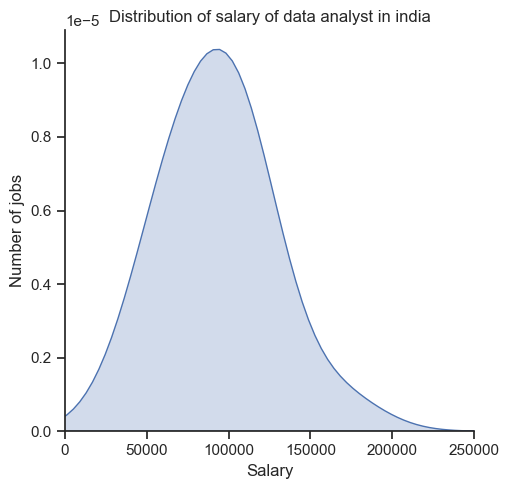

In [13]:
df_DA_IND=df[(df['job_title_short']=='Data Analyst')& (df['job_country']=='India')].copy()
#df_DA_IND['salary_year_avg'].plot(kind='hist',bins=40,edgecolor='black')
sb.displot(df_DA_IND['salary_year_avg'],kind='kde',fill=True)
plt.xlim(0,250000)
plt.title('Distribution of salary of data analyst in india')
plt.xlabel('Salary')
plt.ylabel('Number of jobs')


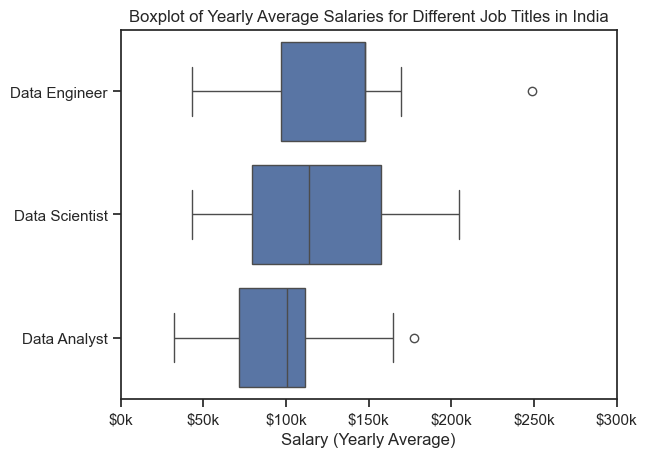

In [16]:
#### Boxplaot
# Define job titles of interest
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']
# Filter the DataFrame for the specified job titles and country
df_IND = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'India')].copy()

# Drop rows with missing salary data
df_IND = df_IND.dropna(subset=['salary_year_avg'])
# Create a list of salary data for each job title
job_list = [df_IND[df_IND['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

# Create the boxplot
# plt.boxplot(job_list, tick_labels=job_titles, vert=False)
sb.boxplot(data=df_IND,x='salary_year_avg',y='job_title_short')
plt.xlabel('Salary (Yearly Average)')
plt.ylabel('')
plt.title('Boxplot of Yearly Average Salaries for Different Job Titles in India')
ax=plt.gca()
plt.xlim(0,300000)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos : f'${int(x/1000)}k'))
plt.show()